Accuracy: 0.8854317603289602
ROC-AUC Score: 0.7154754805762036
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.61      0.02      0.04      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.49     51070
weighted avg       0.85      0.89      0.84     51070



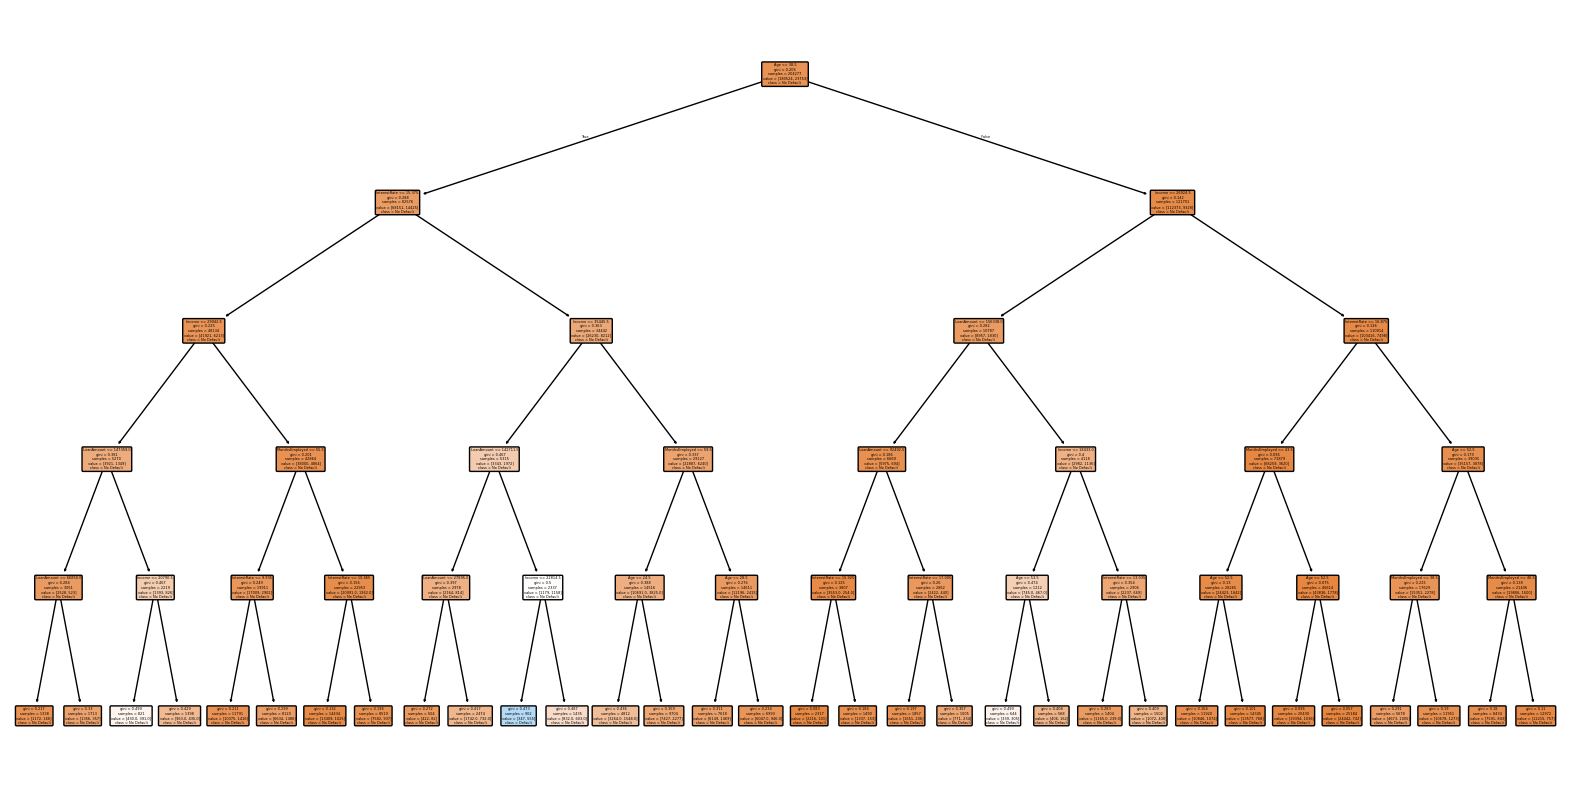

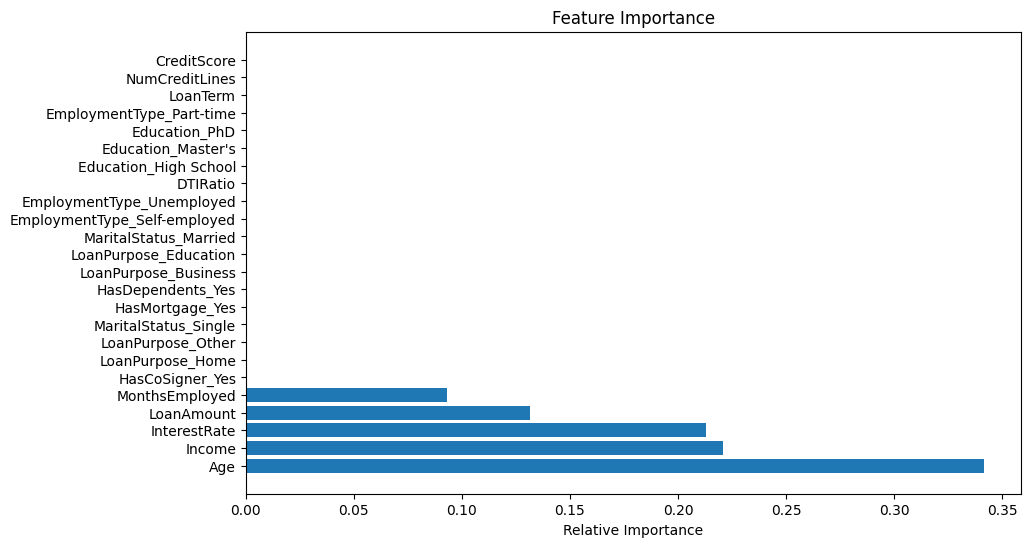

['loan_risk_classifier_decision_tree.pkl']

In [1]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
data = pd.read_csv(r"C:\Users\K Madan Mohan Reddy\Desktop\Loan_default old.csv")

# Drop unnecessary columns
data = data.drop(columns=["LoanID"])

# Encode categorical variables
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Separate features (X) and target (y)
X = data.drop("Default", axis=1)
y = data["Default"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree model
model = DecisionTreeClassifier(
    criterion='gini',   # Splitting criterion (you could also use 'entropy')
    max_depth=5,        # Maximum depth of the tree (can be tuned)
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
import matplotlib.pyplot as plt
from sklearn import tree

# Plot the decision tree (optional, for visual representation)
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=["No Default", "Default"], rounded=True)
plt.show()

# Plot feature importance
import numpy as np
feature_importance = model.feature_importances_
indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), feature_importance[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Relative Importance")
plt.show()

# Save the model
import joblib
joblib.dump(model, "loan_risk_classifier_decision_tree.pkl")


In [1]:

import pandas as pd


In [2]:

data = pd.read_csv(r"C:\Users\K Madan Mohan Reddy\Desktop\Loan_default old.csv")

# Drop unnecessary columns
data = data.drop(columns=["LoanID"])

# Encode categorical variables
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [3]:
data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,False,False,False,True,True,False,False,False,True,True
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,False,True,False,False,False,False,False,False,True,True
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,True,False,False,True,True,False,False,False,False,False
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,False,True,False,False,False,True,False,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,...,False,True,False,False,False,False,False,False,True,False
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,...,False,False,False,False,False,False,False,True,False,False
255344,56,84820,208294,597,70,3,5.29,60,0.50,0,...,False,True,False,True,True,False,False,False,False,True
255345,42,85109,60575,809,40,1,20.90,48,0.44,0,...,False,False,True,True,True,False,False,False,True,False
